In [16]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

mcmc = pickle.load(open('../model/mem_two_proxies.pkl','rb'))
params={'beta0':-1, 'beta1':2, 'gam0':-1, 'gam1':3 , 'mu_x':0.5, 's2_x':1, 's2_ep':1, 's2_v':1, 's2_d':1}


beta0 = mcmc.act_params['beta0']
beta1 = mcmc.act_params['beta1']
gam0 = mcmc.act_params['gam0']
gam1 = mcmc.act_params['gam1']
mu_x = mcmc.act_params['mu_x']
s2_x = mcmc.act_params['s2_x']
s2_ep = mcmc.act_params['s2_ep']
s2_v = mcmc.act_params['s2_v']
s2_d = mcmc.act_params['s2_d']
y = mcmc.act_params['y']
x = mcmc.act_params['x']
w = mcmc.act_params['w']
z = mcmc.act_params['z']
n=120

np.random.seed(1)
v = np.random.normal(0, np.sqrt(s2_v), n)
d = np.random.normal(0, np.sqrt(s2_d), n)
x = np.random.normal(mu_x, np.sqrt(s2_x), n)
ep = np.random.normal(0, np.sqrt(s2_ep), n)

# observed
w = x+v
z = gam0 + gam1*x + d
y = beta0 + beta1*x + ep

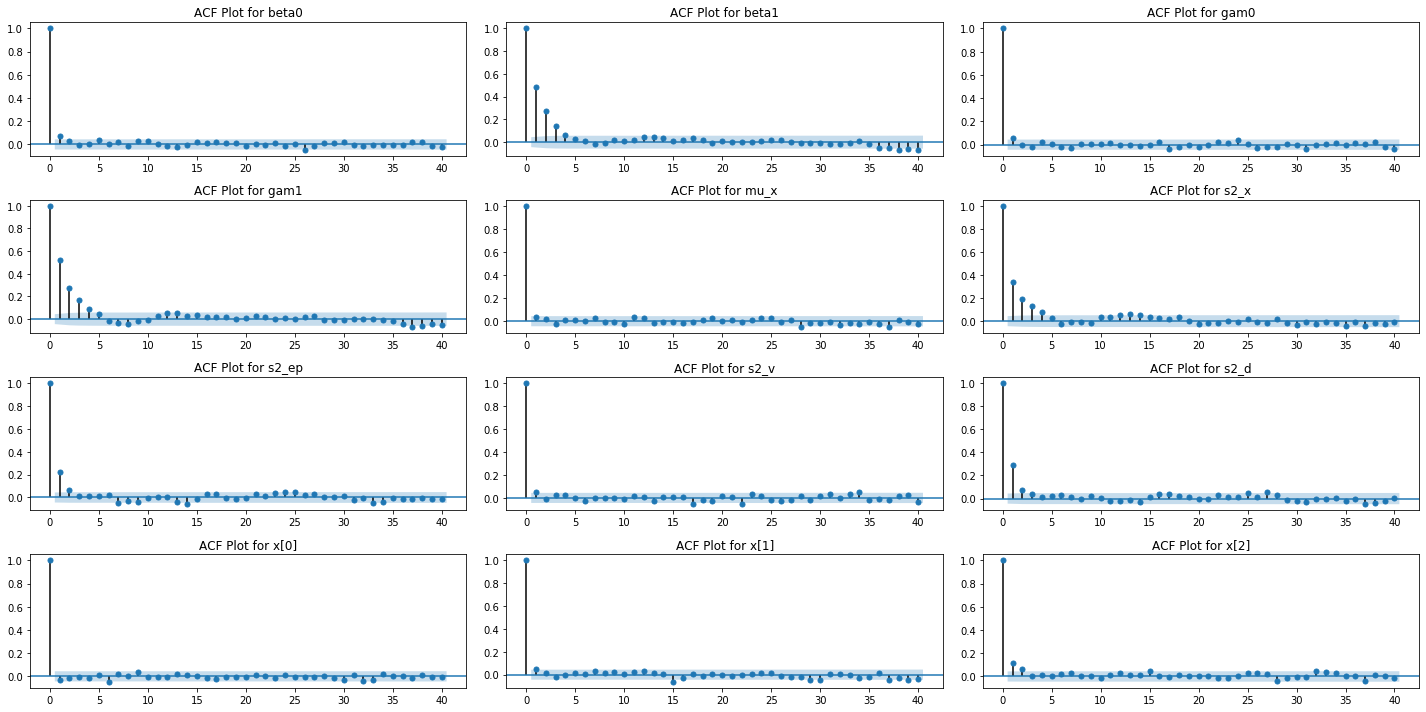

In [17]:
burnin = 30000
thinning = 10

fig, ax = plt.subplots(4,3,figsize=(20,10))
a = 0
for i in range(4):
    for j in range(3):
        
        if i==3:
            key = 'x'
            plot_acf(mcmc.params[key][j,:][burnin::thinning], lags=40, ax=ax[i][j])
            ax[i][j].set_title(f'ACF Plot for {key}[{j}]')
        else:
            key = list(mcmc.params.keys())[a]
            plot_acf(np.array(mcmc.params[key])[burnin::thinning], lags=40, ax=ax[i][j])
            ax[i][j].set_title(f'ACF Plot for {key}')
            
        a += 1
fig.tight_layout()
plt.savefig('autocorr.png')
plt.show()

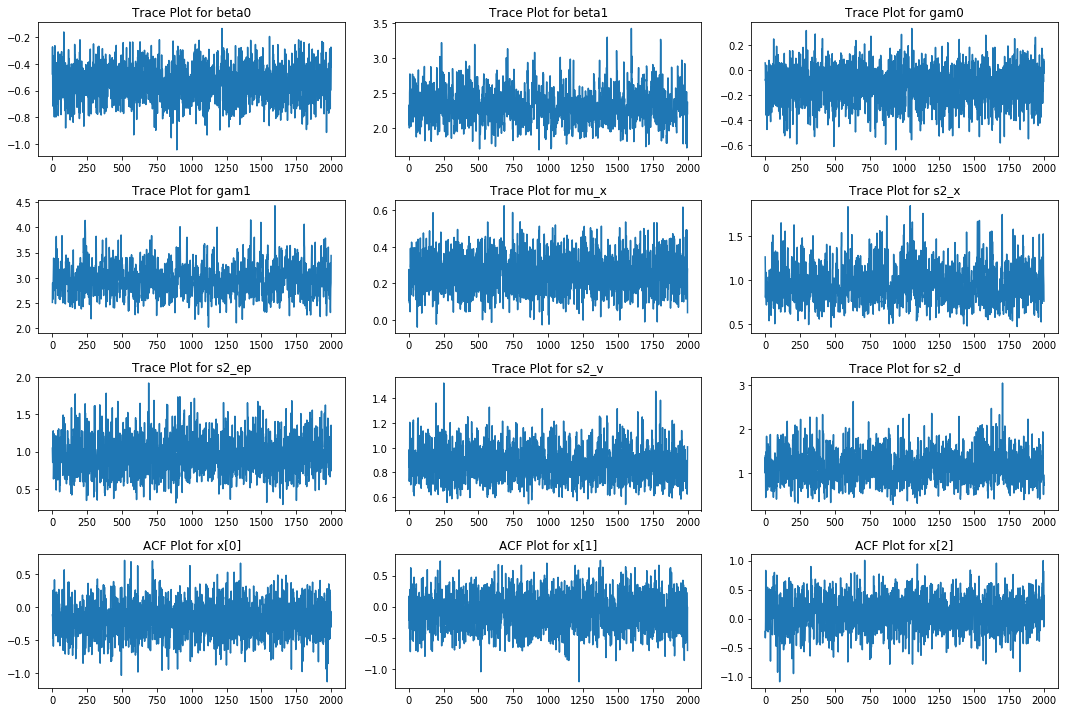

In [18]:
fig, ax = plt.subplots(4,3,figsize=(15,10))
a = 0
for i in range(4):
    for j in range(3):
        if i==3:
            key = 'x'
            ax[i][j].plot(mcmc.params[key][j,:][burnin::thinning])
            ax[i][j].set_title(f'ACF Plot for {key}[{j}]')
        else:
            key = list(mcmc.params.keys())[a]
            ax[i][j].plot(mcmc.params[key][burnin::thinning])
            ax[i][j].set_title(f'Trace Plot for {key}')
        a += 1
fig.tight_layout()
plt.savefig('traceplot.png')
plt.show()

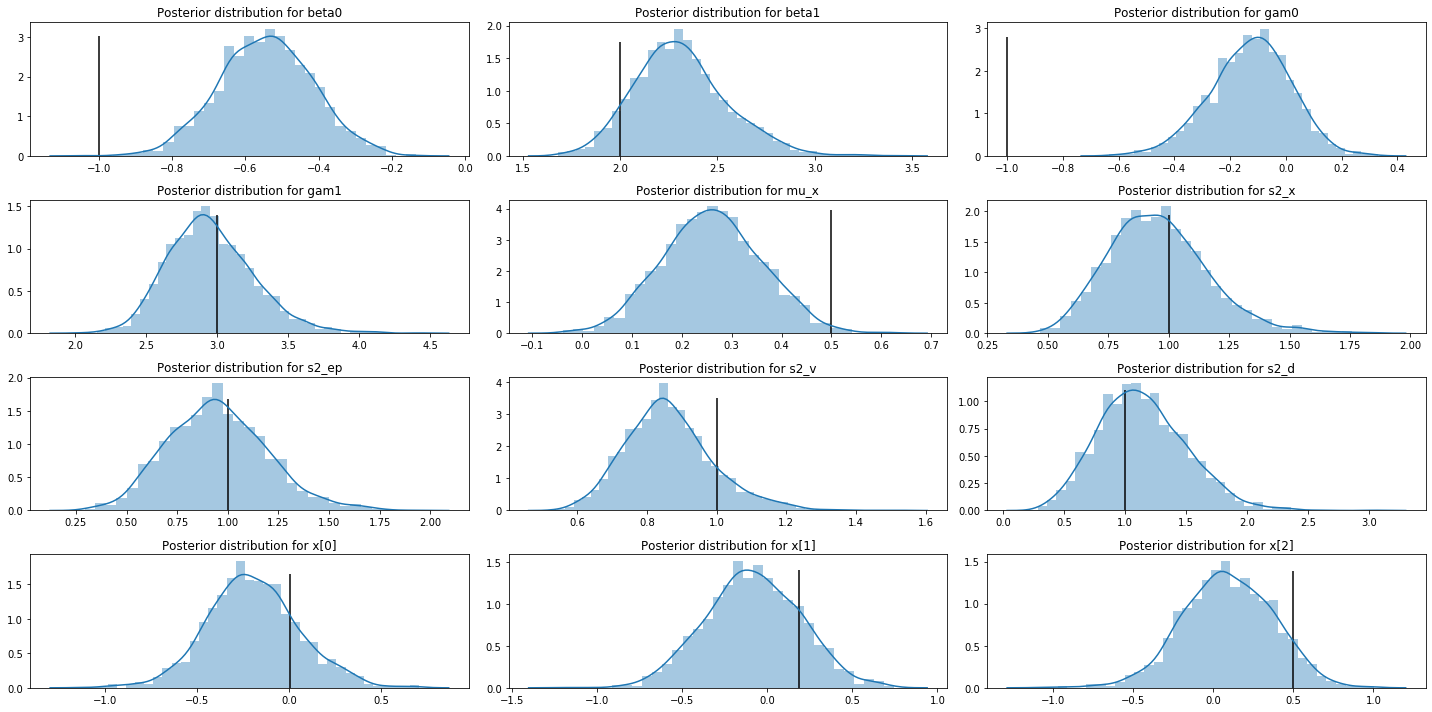

In [19]:
fig, ax = plt.subplots(4,3,figsize=(20,10))
a = 0
for i in range(4):
    for j in range(3):
        if i==3:
            key = 'x'
            sns.distplot(mcmc.params[key][j,:][burnin::thinning], ax=ax[i][j], norm_hist=True)
            kdeline = ax[i][j].lines[0]
            xs = kdeline.get_xdata()
            ys = kdeline.get_ydata()
            ax[i][j].vlines(x[j] ,0, ys.max())
            ax[i][j].set_title(f'Posterior distribution for {key}[{j}]')
            
        else:
            key = list(mcmc.params.keys())[a]
            sns.distplot(mcmc.params[key][burnin::thinning], ax=ax[i][j], norm_hist=True)
            kdeline = ax[i][j].lines[0]
            xs = kdeline.get_xdata()
            ys = kdeline.get_ydata()
            ax[i][j].vlines(params[key] ,0, ys.max())
            ax[i][j].set_title(f'Posterior distribution for {key}')
            
        a += 1
fig.tight_layout()
plt.savefig('/Users/shinbo/Desktop/metting/LDA/meeting materials/20.11.19/density_mem_120.png')
plt.show()

In [6]:
def credible_interval(x, alpha):
    n = len(x)
    sided = int(alpha/2 * n)
    x = sorted(list(x))
    
    lower = x[sided]
    upper = x[n-sided]
    return round(lower,3),round(upper,3)

In [7]:
print('====================== 95% credible interval for each parameter ======================')
params_name = mcmc.params.keys()
for n in params_name:
    
    if n == 'x':
        for i in range(3):
            lower, upper = credible_interval(mcmc.params[n][i,:][burnin::thinning], 0.05)
            print(f'{n}[{i}]:  {lower},  {upper}')
    else:
        lower, upper = credible_interval(mcmc.params[n][burnin::thinning], 0.05)
        print(f'{n}:  {lower},  {upper}')

====================== 95% credible interval for each parameter ======================
beta0:  -0.804,  -0.302
beta1:  1.89,  2.829
gam0:  -0.41,  0.136
gam1:  2.428,  3.581
mu_x:  0.072,  0.452
s2_x:  0.622,  1.453
s2_ep:  0.517,  1.452
s2_v:  0.657,  1.152
s2_d:  0.495,  1.903
x[0]:  -0.668,  0.334
x[1]:  -0.633,  0.44
x[2]:  -0.431,  0.607
